In [1]:
import os, json
import numpy as np

# walk = sorted(os.walk("."), key=lambda x: x[0])[::-1]
# for dirpath, dirnames, filenames in walk:
#     if "testingSetScores.json" in filenames:
#         data = json.load(open(os.path.join(dirpath, "testingSetScores.json"), "r"))
#         # sort data
#         data = dict(sorted(data.items(), key=lambda x: x[1]["ID"]))
#         deltas = []
#         for k in data:
#             initial_prompt_score = list(data[k]["initial_prompt"].values())[0]
#             optimized_prompt_score = list(data[k]["optimized_prompt"].values())[0]
#             delta = optimized_prompt_score - initial_prompt_score
#             deltas.append(delta)
            
#         print(deltas)
#         avg_change = sum(deltas) / len(deltas)
#         print(f"Avg change: {dirpath}: {avg_change}")
        
        
with open("testingSetScores.json", "r") as f:
    data = json.load(f)
    deltas = []
    for k in data:
        initial_prompt_score = list(data[k]["initial_prompt"].values())[0]
        optimized_prompt_score = list(data[k]["optimized_prompt"].values())[0]
        delta = optimized_prompt_score - initial_prompt_score
        deltas.append(delta)
        
    print(deltas)
    avg_change = np.mean(deltas)
    std = np.std(deltas)
    ci = 1.96 * std / np.sqrt(len(deltas))
    print(f"Avg change: {avg_change}")
    print(f"Std: {std}")
    print(f"95% CI: {ci}")
    
    # Plot the points on a vertical line with the confidence interval
    # import matplotlib.pyplot as plt
    # xs = np.zeros(len(deltas))
    # plt.figure()
    # plt.errorbar(xs, deltas, yerr=ci, fmt='o')
    # plt.show()

[24.28426339538653, 0.11534852519837102, 47.26725752278343, 42.40603835434047, 15.16177471897154, 5.268580993974918, 9.056827399251912, 0.9693667827169463, 63.82587041162455, 5.648836041778772, 14.404662694875796, 1.6251764384919056, 2.9515038129369735, 6.022475375635686, 12.55987695954229, -0.00618346759240751, 15.336265633737355, 42.53499914565623, 9.093413225530076, 4.16771734158144, -0.13622682551958576, 16.637658209855324, 0.8399699427739478, 9.236109354049145, 57.6508099498364, 10.587181140873525, 24.334091796218978, -0.0813690810870007, 53.65430551983715, 2.9890052786523906, 30.053936699108423, 5.212800583812296, 2.274517987665817, 12.880394282310679, 18.249997655225513, 40.59840023817388]
Avg change: 16.87987927883916
Std: 18.050487748860895
95% CI: 5.896492664627893


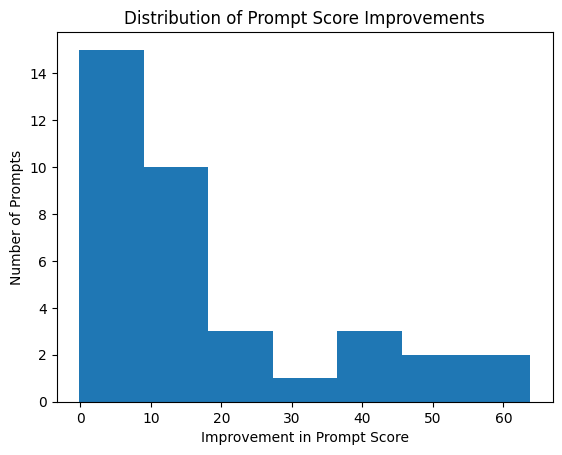

In [2]:
import matplotlib.pyplot as plt
plt.hist(deltas, bins=7)
plt.xlabel("Improvement in Prompt Score")
plt.ylabel("Number of Prompts")
plt.title("Distribution of Prompt Score Improvements")
plt.show()

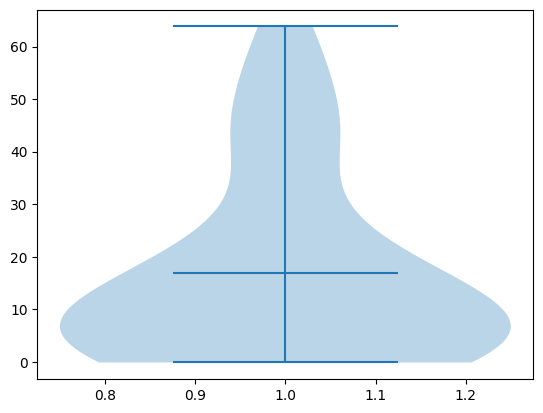

In [3]:
import matplotlib.pyplot as plt
plt.figure()
plt.violinplot(deltas, showmeans=True)
plt.show()